# Compensatori e luogo delle radici

Benvenuti alla prossima fase del nostro corso sui Principi di Controllo Automatico. In questo quaderno approfondiremo il Root Locus Design.

Cominciamo rivisitando alcuni dei concetti di cui abbiamo parlato in precedenza per poi passare ad esempi pratici di progettazione.

## Cos'è un compensatore?

Un compensatore è un tipo di controller, come PI (Proporzionale-Integrale), PD (Proporzionale-Derivativo) o PID (Proporzionale-Integrale-Derivativo), progettato per migliorare le prestazioni di un sistema.

Le prestazioni nei sistemi di controllo sono generalmente classificate in due tipologie:

1. **Prestazioni transitorie:** il modo in cui il sistema risponde ai cambiamenti nel tempo, soprattutto quando si sta adattando per raggiungere il suo stato stazionario.
2. **Prestazioni allo stato stazionario:** il comportamento del sistema una volta che si è stabilizzato in uno schema coerente nel tempo.

Le prestazioni transitorie sono cruciali perché determinano la rapidità e la precisione con cui il sistema raggiunge lo stato desiderato dopo un disturbo. Le prestazioni in stato stazionario, d’altro canto, sono importanti per la stabilità e l’accuratezza a lungo termine del sistema.

## Struttura del sistema con compensatori

Consideriamo una tipica struttura del sistema di controllo:

- **L'impianto:** la parte centrale del sistema controllato.
- **Il controller/compensatore:** Un dispositivo o algoritmo che regola la produzione dell'impianto in base al feedback.

<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_block_diagram.png?1" alt="24_Compensators_and_Root_Locus_block_diagram" style="width:550px;"/>
    </td>
</tr>
</table>


In questa configurazione il compensatore ($D(s)$) è posto in cascata con l'impianto. Questa disposizione può anche essere modificata con circuiti di feedback minori, che possono essere rappresentati in un formato strutturale simile a fini di progettazione.

È fondamentale comprendere che la scelta del compensatore influisce sia sul comportamento transitorio che su quello stazionario del sistema. Un compensatore ben scelto può migliorare significativamente la risposta del sistema ai cambiamenti e mantenere la stabilità nel tempo.

## Tipi di compensatori

### Compensatore di fase

**Definizione e funzione di trasferimento**

Un compensatore di anticipo di fase viene utilizzato per migliorare le prestazioni transitorie spostando il luogo delle radici a sinistra, migliorando così la stabilità del sistema. La funzione di trasferimento di un compensatore di fase è data da:

$$ D(s) = K_c \frac{(s + z_c)}{(s + p_c)} $$

Dove:
- $ K_c $ è il guadagno.
- $ z_c $ è lo zero del compensatore.
- $ p_c $ è il polo del compensatore.

- **Realizzazione fisica**: spesso realizzata utilizzando un circuito Op-Amp con valori specifici di resistore e condensatore che determinano $ z_c $, $ p_c $ e $ K_c $.

<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_lead_compensator.png?1" alt="24_Compensators_and_Root_Locus_lead_compensator" style="width:550px;"/>
    </td>
</tr>
</table>

_Figura: grafico che illustra il diagramma polo-zero di un compensatore di fase. Lo zero è in $ -z_c $ e il polo in $ -p_c $, con il polo più lontano dall'origine rispetto allo zero._

#### Principi di progettazione del compensatore

- Lo zero nel compensatore di anticipo di fase (a $ s = -z_c $) introduce un'azione derivativa, spostando il diagramma del luogo delle radici verso la metà sinistra del piano, migliorando così la stabilità e le prestazioni transitorie.
- Per l'attenuazione del rumore, in particolare del rumore ad alta frequenza, è incluso un polo aggiuntivo, rappresentato dal polo in $ s = -p_c $.
- Il posizionamento del compensatore principale è fondamentale nei casi in cui è necessario migliorare le prestazioni transitorie.

- Il controller PD è un caso speciale di compensatore di fase che non include il polo.

**Domanda pop-up:** Perché viene utilizzato un compensatore di fase per migliorare le prestazioni transitorie?
**Risposta:** Perché sposta il luogo delle radici a sinistra, migliorando la stabilità del sistema e la risposta transitoria.

### Esempio: compensatore di anticipo di fase

Applichiamo questi concetti ad un esempio pratico: il controllo dell'assetto di un satellite. Il sistema può essere modellato come $ \frac{1}{s^2} $.

#### Scenario: Controllo dell'assetto satellitare

**Modello di sistema**:

$$ G(s) = \frac{1}{s^2} $$ (derivato in una classe tutorial)


**Ingresso**: Coppia $ T(t) $
**Risultato**: Angolo di attitudine $ \theta(t) $
**Tipo di sistema**: Tipo-2 (implica buone prestazioni in stato stazionario: errore zero per gli ingressi di gradino e rampa ed errore finito per gli ingressi di accelerazione)

**Dichiarazione del problema**: Affrontare l'instabilità dovuta a un doppio integratore all'origine.

<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_attitude_control_1.png?2" alt="24_Compensators_and_Root_Locus_attitude_control_1" style="width:550px;"/>
    </td>
</tr>
</table>

#### Progettazione iniziale del sistema

Iniziamo a considerare la semplice situazione in cui

$$
D(s) = K
$$

Ciò corrisponde alla situazione in cui $D(s)=K$ è la costante di un attuatore che converte i segnali elettrici in una coppia $T(t)$ per i propulsori.


**Funzione di trasferimento ad anello aperto**:

$$ G(s) = \frac{K}{s^2} $$

**Comportamento a circuito chiuso**:

Possiamo analizzarlo utilizzando il luogo delle radici al variare di $K$.

<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_attitude_control_2.png?2" alt="24_Compensators_and_Root_Locus_attitude_control_2" style="width:350px;"/>
    </td>
</tr>
</table>

### Comprendere il diagramma del luogo delle radici

Ricordate, il grafico del luogo delle radici è una rappresentazione grafica di come i poli a circuito chiuso di un sistema di controllo variano con le modifiche di un parametro di sistema, in genere il guadagno.

Per il sistema $ \frac{K}{s^2} $, il grafico del luogo delle radici indica una natura oscillatoria. Questo perché per tutti i valori di 's' le radici giacciono sull'asse immaginario del piano s, che è caratteristico delle oscillazioni non smorzate.

Possiamo tracciare il luogo delle radici usando Python in questo modo:

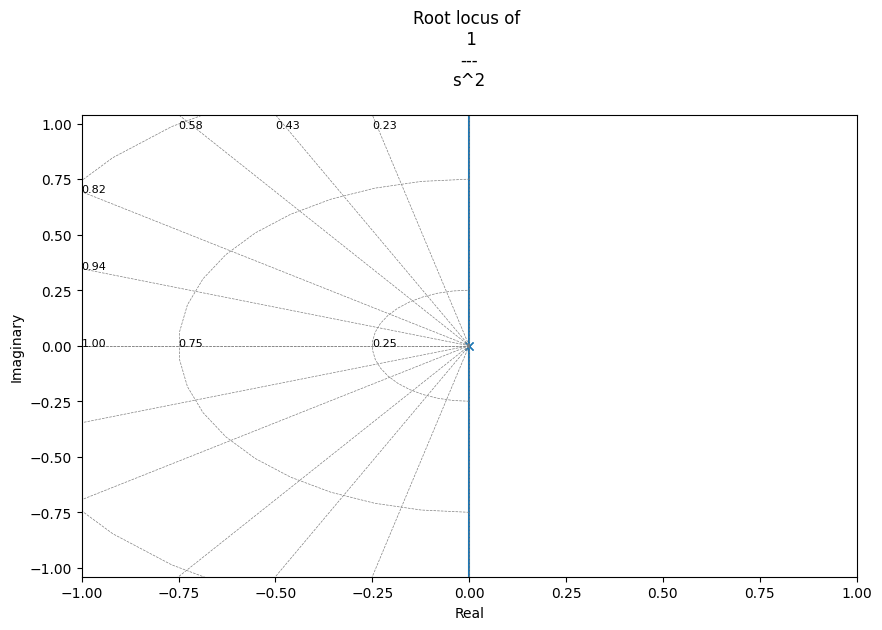

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

numerator = [1]
denominator = [1, 0, 0]
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
plt.figure(figsize=(10, 6))
ctl.root_locus(G, plot=True);
plt.title(f'Root locus of {G}');

Ecco uno script Python che simula il sistema a ciclo chiuso:

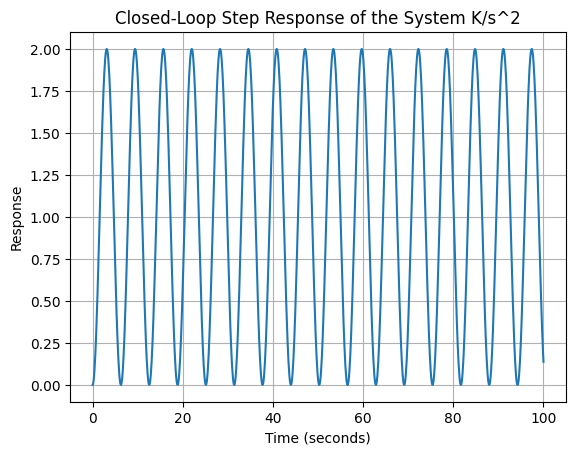

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# System parameters
K = 1  # You can modify this gain value as needed

# Transfer function of the system
numerator = [K]
denominator = [1, 0, 0]  # s^2 term has a coefficient of 1, s term is 0, constant term is 0
system = ctl.tf(numerator, denominator)

# Closed loop transfer function with a unity feedback
# For a unity feedback system, the feedback transfer function is simply 1
closed_loop_system = ctl.feedback(system, 1)

# Time parameters for simulation
t = np.linspace(0, 100, 1000)  # Simulation from 0 to 10 seconds, with 1000 points

# Step response
t, y = ctl.step_response(closed_loop_system, t)

# Plotting
plt.plot(t, y)
plt.title('Closed-Loop Step Response of the System K/s^2')
plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.grid(True)
plt.show()


### Processo decisionale nella progettazione del compensatore

#### Scelta tra anticipo di fase e compensatore di ritardo di fase

- **Compensatore di fase principale**: ideale per migliorare le prestazioni transitorie spostando il luogo della radice a sinistra, migliorando la stabilità.
- **Compensatore di ritardo di fase**: aggiunge un altro integratore al sistema (o qualcosa di molto simile), rendendolo un sistema di tipo 3, che porta all'instabilità. Viene generalmente utilizzato per migliorare la precisione in stato stazionario. Modifica il codice Python sopra o traccia il luogo delle radici per un sistema di tipo 3.

Nel nostro scenario attuale, la preoccupazione principale non è la precisione dello stato stazionario ma le prestazioni transitorie. Pertanto, la scelta preferita è un compensatore di fase.

### Implementazione del compensatore di anticipo di fase

#### Il concetto

Il compensatore di fase è rappresentato dalla funzione di trasferimento:

$$ D(s) = K_c \frac{(s + z_c)}{(s + p_c)} $$

dove $ K_c $, $ z_c $ e $ p_c $ sono i parametri che possiamo determinare per soddisfare i nostri requisiti.

_Nota: i concetti alla base del design sono più importanti del design specifico. Possono essere adatti più modelli._


#### L'approccio progettuale

1. **Rappresentazione del sistema**: La funzione di trasferimento dell'impianto è data da $ G(s) = \frac{K}{s^2} $, dove $ K $ è un guadagno regolabile. Possiamo quindi prendere il compensatore come $ \frac{s + z_c }{ s + p_c }$.
2. **Considerazioni sull'implementazione**: A seconda dell'hardware, il guadagno $ K $ potrebbe essere regolato all'interno dell'impianto o tramite uno stadio di amplificazione esterno nel compensatore.

Ci sono tre parametri sotto il nostro controllo. Il modo in cui implementiamo questi parametri dipende dall'hardware.

Chiamiamo $ \frac{K}{s^2} $ come _sistema non compensato_ che in questo caso include il parametro di progettazione $K$.

Consideriamo un sistema di controllo dell'assetto per un satellite:
- Sistema non compensato: $$ \frac{K}{s^2} $$
- Compensatore: $$ D(s) = \frac{s + z_c}{s + p_c} $$

### Progettazione per requisiti prestazionali specifici

#### Tradurre le prestazioni in posizioni dei poli a circuito chiuso

Supponiamo che i requisiti di progettazione siano un rapporto di smorzamento $ \zeta = 0,707 $ e un tempo di assestamento $ t_s = 2$ secondi. Il nostro obiettivo è tradurre questi requisiti nelle posizioni dei poli a circuito chiuso desiderate.

Ricorda che i requisiti transitori potrebbero esserti forniti in termini di $\omega_n $ (frequenza naturale), $M_p$ (Overshoot Peak), ecc.

Ricordatevi inoltre che spesso possiamo passare da una specifica esigenza all'altra. Ad esempio possiamo calcolare:

$$
\zeta\omega_n = \frac{4}{t_s} = 2
$$

Da questi valori è possibile determinare la posizione dei poli del circuito chiuso. Di seguito i passaggi per farlo.

Per calcolare la posizione dei poli desiderati ad anello chiuso per un sistema di controllo con un rapporto di smorzamento $ \zeta $ e un tempo di assestamento $ t_s $ specificati, utilizziamo le formule standard relative alle caratteristiche di risposta del sistema del secondo ordine.

I poli desiderati a circuito chiuso sono generalmente coniugati complessi per sistemi sottosmorzati e la loro posizione nel piano s è determinata dal rapporto di smorzamento $ \zeta $ e dalla frequenza naturale $ \omega_n $.

Dato:
- Rapporto di smorzamento $\zeta = 0,707 $
- Tempo di assestamento $ t_s = 2 $ secondi

1. **Calcola la frequenza naturale ($ \omega_n $)**: Il tempo di assestamento per un sistema del secondo ordine è approssimato da $ t_s \about \frac{4}{\zeta \omega_n} $. Riorganizziamo questo per risolvere $ \omega_n $:

   $$ \omega_n = \frac{4}{\zeta t_s} $$

   Sostituendo i valori dati:

   $$ \omega_n = \frac{4}{0,7 \times 2} = \frac{4}{1,4} \circa 2,857 \, \text{rad/s} $$

2. **Determinare le parti reale e immaginaria dei poli**: La forma generale dei poli ad anello chiuso per un sistema del secondo ordine è:

   $$ s = -\zeta \omega_n \pm j\omega_n\sqrt{1 - \zeta^2} $$

   La parte reale (sigma) è data da $ -\zeta \omega_n $ e la parte immaginaria (omega) da $ \omega_n\sqrt{1 - \zeta^2} $.

   Calcolando questi:

   - Parte reale: $ -\zeta \omega_n = -0.7 \times 2.857 \circa -2 $
   - Parte immaginaria: $ \omega_n\sqrt{1 - \zeta^2} = 2.857 \times \sqrt{1 - 0.49} \circa 2.857 \times \sqrt{0.51} \circa 2.857 \times 0.714 \circa 2 $

3. **Posizioni dei poli ad anello chiuso**: Pertanto, i poli ad anello chiuso si trovano approssimativamente a:

   $$ s = -2 \pm j2 $$

Questi calcoli forniscono le posizioni desiderate per i poli a circuito chiuso nel piano s per ottenere il rapporto di smorzamento e il tempo di assestamento specificati nella progettazione del sistema di controllo.

Possiamo tracciarlo sul piano s:


<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_attitude_control_3.png?2" alt="24_Compensators_and_Root_Locus_attitude_control_3" style="width:550px;"/>
    </td>
</tr>
</table>

_Figura: grafico del luogo delle radici del sistema non compensato. È possibile identificare dove dovrebbero essere i poli dell'anello chiuso per la prestazione desiderata._

Dobbiamo modificare il comportamento del luogo delle radici per passare attraverso i poli desiderati a circuito chiuso in modo che i requisiti sulla precisione transitoria siano soddisfatti.

### Progettazione del compensatore di fase: posizionamento dello zero e del polo

#### Passaggio 1: posizionamento iniziale di zero e polo sul piano s

Inizia posizionando provvisoriamente lo zero ($ z_c $) e il polo ($ p_c $) del compensatore sul piano s. Questo posizionamento iniziale non deve essere esatto; è un punto di partenza per la messa a punto.

- **Zero ($ z_c $)**: posizionalo più vicino all'asse immaginario.
- **Pole ($ p_c $)**: posizionalo più a sinistra dello zero sull'asse reale.

#### Passaggio 2: regolazione del criterio dell'angolo

Per garantire che la risposta a circuito chiuso del sistema soddisfi i nostri requisiti, il luogo delle radici deve passare attraverso le posizioni dei poli a circuito chiuso desiderate. Ciò richiede il rispetto del criterio dell'angolo in questi punti.

1. **Comprensione del criterio dell'angolo**:
   - Il criterio dell'angolo afferma che la somma degli angoli di fase da tutti i poli e gli zeri a un punto sul piano s deve essere uguale a un multiplo dispari di 180 gradi affinché il punto si trovi sul luogo delle radici.
   - Per un compensatore in piombo, gli angoli importanti sono quelli forniti dallo zero del compensatore ($ \theta_{z_c} $) e dal polo ($ \theta_{p_c} $), e l'angolo dai poli della pianta ($ \theta_1 $) .

2. **Calcolo dei contributi angolari**:
   - Dobbiamo trovare gli angoli $ \theta_{z_c} $ e $ \theta_{p_c} $ tali che soddisfino l'equazione:
   
     $$ \theta_{z_c} - \theta_{p_c} - 2\theta_1 = -180^\circ $$
   
   - Qui, $ \theta_{z_c} $ e $ \theta_{p_c} $ sono rispettivamente gli angoli dallo zero e dal polo del compensatore alla posizione desiderata del polo a circuito chiuso, e $ 2\theta_1 $ è il contributo del polo della pianta poli.

<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_attitude_control_4.png?2" alt="24_Compensators_and_Root_Locus_attitude_control_4" style="width:550px;"/>
    </td>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_attitude_control_5.png?2" alt="24_Compensators_and_Root_Locus_attitude_control_5" style="width:550px;"/>
    </td>
</tr>
</table>

### Guida passo passo alla progettazione del compensatore con il luogo delle radici

#### Comprendere il ruolo dei poli e degli angoli

1. **Punto iniziale**: Conosciamo i poli della pianta, quindi possiamo determinare $ \theta_1 $, il contributo angolare di questi poli a qualsiasi punto nel piano s.
2. **Poli desiderati ad anello chiuso**: nel nostro esempio, sono a $ -2 \pm j2 $. Questo ci fornisce un riferimento per determinare i contributi angolari necessari dal compensatore.

#### Calcolo del contributo del compensatore

1. **Contributo angolare netto**: Il compensatore deve fornire un angolo netto $ \theta_{z_c} - \theta_{p_c} $, dove $ \theta_{z_c} $ e $ \theta_{p_c} $ sono gli angoli dallo zero e dal polo del compensatore ai poli desiderati ad anello chiuso.
2. **Formula**: Dati $ \theta_1 = 135^\circ $, calcoliamo:

   $$
   \theta_{z_c} - \theta_{p_c} = -180^\circ + 2 \cdot 135^\circ = -180^\circ + 270^\circ = 90^\circ
   $$

#### Posizionamento dello zero e determinazione del polo

1. **Strategia generale**: in genere, scegliamo una posizione per lo zero e quindi calcoliamo dove dovrebbe trovarsi il polo per soddisfare la condizione dell'angolo.
2. **Esempio di calcolo**:
   - Posizionare lo zero a -1 sull'asse reale del piano s.
   - Il luogo delle radici risultante mostra che la condizione dell'angolo è soddisfatta (l'abbiamo progettata per soddisfarla) e che il luogo passa attraverso i poli desiderati del circuito chiuso.


<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_attitude_control_6.png?2" alt="24_Compensators_and_Root_Locus_attitude_control_6" style="width:550px;"/>
    </td>
</tr>
</table>

#### Valutazione del design

1. **Condizione di dominanza**: anche se la condizione dell'angolo è soddisfatta, dobbiamo garantire che sia soddisfatta anche la condizione di dominanza. Ciò significa che il comportamento del sistema progettato dovrebbe corrispondere strettamente al comportamento atteso da un sistema di secondo ordine con $ \zeta $ dato.
2. **Problema con il terzo polo**: nel nostro esempio, il terzo polo si sposta vicino allo zero, influenzando potenzialmente il superamento del sistema e non soddisfacendo la condizione di dominanza.

#### Calcolo del terzo polo e verifica della dominanza

1. **Criterio di magnitudo**: utilizzare il criterio di magnitudo per calcolare il valore di $ K $ corrispondente ai poli desiderati a circuito chiuso. In questo caso, $ K = 16 $.
2. **Trovare il terzo polo**: Con $ K = 16 $, individua il terzo polo e verifica se la condizione di dominanza è soddisfatta.
3. **Simulazione**: se la condizione di dominanza non è soddisfatta, simula la risposta del sistema per valutare l'influenza del terzo polo.

#### Linee guida per posizionare lo zero

1. **Posizione preferita**: Idealmente, posizionare lo zero a sinistra dei poli a circuito chiuso coniugati complessi desiderati. Ciò garantisce che il terzo polo si trovi a sinistra dei poli desiderati, soddisfacendo la condizione di dominanza. Questo perché il ramo del luogo delle radici terminerà in quello zero.

2. **Eccezioni**: a volte questo posizionamento ideale non è possibile. In questi casi, come nel caso del nostro contributo dell'angolo netto di 90°, potrebbe essere necessario posizionare lo zero a destra.

#### Risolvere per $K$

Per risolvere il guadagno $ K $ nel nostro esempio di sistema di controllo, dove lo zero del compensatore $ z_c $ è a -1 e il polo $ p_c $ è a -6, seguiamo i passaggi descritti in precedenza. Dobbiamo calcolare $ K $ in modo tale che la condizione di magnitudo sia soddisfatta ai poli desiderati del circuito chiuso $ -2 \pm j2 $.

Dato:

- Poli desiderati in anello chiuso: $ -2 \pm j2 $
- Zero $ z_c = -1 $
- Polo $ p_c = -6 $

La funzione di trasferimento ad anello aperto $ G(s) $ è:

$$ D(s)G(s) = \frac{K \cdot (s + z_c)}{s^2 \cdot (s + p_c)} $$

Sostituendo $ z_c = -1 $ e $ p_c = -6 $ nella funzione di trasferimento, otteniamo:

$$ D(s)G(s) = \frac{K \cdot (s + 1)}{s^2 \cdot (s + 6)} $$

#### Applicazione della condizione di grandezza

Ora applichiamo la condizione di magnitudo a uno dei poli desiderati del circuito chiuso, diciamo $ s = -2 + j2 $:

$$ |G(-2 + j2)| = 1$$

$$ \frac{K \cdot \left|(-2 + j2) + 1\right|}{\left|(-2 + j2)^2\right| \cdot \sinistra|(-2 + j2) + 6\destra|} = 1 $$

Semplifichiamo questa equazione:

$$ \frac{K \cdot \left|-1 + j2\right|}{\left| (-2 + j2)^2\destra| \cdot \sinistra|4 + j2\destra|} = 1 $$

#### Risolvere per $ K $

Per prima cosa dobbiamo semplificare i numeri complessi nell’equazione:

1. **Numeratore**: $ -3 + j2 $
2. **Denominatore**: semplifichiamo $ (-2 + j2)^2 $ e $ (4 + j2) $, quindi li moltiplichiamo insieme.

Facciamo questi calcoli:

- $ \sinistra|(-2 + j2)^2\destra| = \left|(-2)^2 + (j2)^2 + 2 \cdot (-2) \cdot j2 \right| = \sinistra|- 8j\destra| = 8$

Quindi, calcola le magnitudini:

- Entità del numeratore: $ \sqrt{(-1)^2 + 2^2} = 2,23$
- Entità del denominatore: $ \sqrt{(-2)^2 + 2^2} = 8$ e $ \sqrt{4^2 + 2^2} = 4,47$.

Infine, risolvi $ K $ utilizzando:

$$ \frac{K \cdot \text{Grandezza del numeratore}}{\text{Grandezza del denominatore}} = \frac{8(4,47)}{2,23} = 16$$

### Condizioni dell'angolo di bilanciamento e attenuazione del rumore nella progettazione del compensatore

Nella progettazione di un compensatore, in particolare di un compensatore in anticipo di fase, un aspetto cruciale da considerare è il rapporto tra il polo e lo zero del compensatore. Questa relazione non è solo una questione di soddisfare le condizioni geometriche per i requisiti angolari, ma svolge anche un ruolo importante nell'attenuazione del rumore, soprattutto per i segnali ad alta frequenza.

#### Il ruolo del rapporto poli-zero

1. **Considerazioni geometriche per le condizioni angolari**:
   - Il posizionamento del polo e dello zero sul piano s è inizialmente guidato dalla necessità di soddisfare la condizione angolare del metodo del luogo delle radici.
   - Questa condizione garantisce che il compensatore alteri effettivamente il luogo delle radici del sistema per ottenere le caratteristiche di risposta transitoria desiderate.

2. **Aspetto del filtraggio del rumore**:
   - Oltre a soddisfare le condizioni angolari, il polo del compensatore funge da filtro per il rumore ad alta frequenza.
   - La posizione del polo rispetto allo zero influisce in modo significativo sulla capacità del compensatore di attenuare le componenti ad alta frequenza.

#### Rapporto ideale tra polo e zero

- **Fattore di 10 per l'attenuazione**:
  - In genere si consiglia che il rapporto tra lo zero e il polo sia intorno a 10. È stato riscontrato che questo rapporto fornisce un'attenuazione efficace delle alte frequenze.
  - Ad esempio, se lo zero è posizionato a -1 sull'asse reale, un polo corrispondente a -10 può offrire un buon equilibrio tra soddisfazione della condizione angolare e riduzione del rumore.

#### Bilanciamento degli obiettivi di progettazione

- **Compromessi nel design**:
  - Spesso, i progettisti dei sistemi di controllo si trovano ad affrontare un compromesso tra il rigoroso rispetto delle condizioni angolari per le prestazioni transitorie desiderate e il posizionamento del palo per un'attenuazione ottimale del rumore ad alta frequenza.
  - Questo equilibrio è fondamentale per garantire che il compensatore non solo migliori la risposta del sistema ma mantenga anche la robustezza contro i disturbi ad alta frequenza.

### Trovare il terzo polo

Per calcolare la posizione del terzo polo in un sistema di controllo in cui è stato aggiunto un compensatore di fase ed è stato determinato il guadagno $ K $, possiamo seguire questi passaggi:

1. **Funzione di trasferimento ad anello aperto**: richiama la funzione di trasferimento ad anello aperto con il compensatore:
   $$ D(s)G(s) = \frac{K \cdot (s + z_c)}{s^2 \cdot (s + p_c)} $
   dove $ z_c $ è lo zero e $ p_c $ è il polo del compensatore.

2. **Valori noti sostitutivi**: sostituisce i valori noti per $ K $, $ z_c $ e $ p_c $ nella funzione di trasferimento ad anello aperto.

3. **Metodo del luogo delle radici**: per trovare la posizione del terzo polo, è possibile utilizzare il metodo del luogo delle radici. Ciò implica tracciare il luogo delle radici della funzione di trasferimento ad anello aperto e identificare dove si trova il terzo polo in base al valore di $ K $.

4. **Approccio analitico**: In alternativa, per un approccio analitico, è possibile impostare l'equazione caratteristica del sistema a circuito chiuso, che è:
   $$ 1 + G(s)H(s) = 0 $$
   Risolvendo questa equazione otterrai i poli del sistema a circuito chiuso.

5. **Risoluzione dell'equazione caratteristica**: L'equazione caratteristica sarà un'equazione cubica in $ s $ (poiché il sistema originale è del secondo ordine e il compensatore aggiunge un ordine). Risolvendo questa equazione cubica otterrai tre soluzioni, corrispondenti ai tre poli del sistema a circuito chiuso.

6. **Identificazione del terzo polo**: due di questi poli saranno i poli desiderati a circuito chiuso (ad esempio, $ -2 \pm j2 $ nel nostro esempio). La terza soluzione sarà il polo aggiuntivo introdotto dal compensatore.

#### Considerazioni pratiche

- **Strumenti computazionali**: risolvere analiticamente l'equazione cubica può essere complesso. Spesso è più pratico utilizzare strumenti computazionali come MATLAB o Python, che possono calcolare in modo efficiente le radici delle equazioni polinomiali.

- **Dominanza dei poli**: una volta trovato il terzo polo, dovresti verificarne la dominanza nella risposta del sistema. Se è all'estrema sinistra nel piano s, il suo effetto sulla risposta transitoria del sistema potrebbe essere trascurabile. Se è più vicino all'asse immaginario, potrebbe influenzare in modo significativo il comportamento del sistema.

In [ ]:
import numpy as np

# Coefficients of the cubic equation
coefficients = [1, 6, 16, 16]

# Finding the roots
roots = np.roots(coefficients)

# Display the roots
print("The poles of the system are:", roots)


The poles of the system are: [-2.+2.j -2.-2.j -2.+0.j]


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider


def calculate_settling_time(T, yout, tol=0.02):
    # Settling time is the time at which the response remains within a certain tolerance
    settled_value = yout[-1]
    lower_bound = settled_value * (1 - tol)
    upper_bound = settled_value * (1 + tol)
    within_tol = np.where((yout >= lower_bound) & (yout <= upper_bound))[0]
    if within_tol.size == 0:
        return np.nan  # Return NaN if the system never settles
    return T[within_tol[0]]

def calculate_steady_state_error(system_type, G, K, time_span):
    G_closed_loop = ctl.feedback(K * G)
    if system_type == 'step':
        # Steady-state error for step input (Type 0 system)
        T, yout = ctl.step_response(G_closed_loop, T=np.linspace(0, time_span[-1], 500))
        steady_state_val = yout[-1]
        return 1 - steady_state_val
    elif system_type == 'ramp':
        # Steady-state error for ramp input (Type 1 system)
        Kv = ctl.dcgain(G_closed_loop * ctl.TransferFunction([1, 0], [1]))
        return 1 / Kv if Kv != 0 else np.inf
    else:
        return np.nan

# def plot_step_response(G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     T, yout = ctl.step_response(G_closed_loop, T=np.linspace(0, time_span[-1], 500))
#     plt.plot(T, yout)
#     settling_time = calculate_settling_time(T, yout)
#     steady_state_error = calculate_steady_state_error('step', G, K, time_span)
#     plt.title(f'Step Response for Gain K={K}\nSettling Time: {settling_time:.2f}, Steady-State Error: {steady_state_error:.2f}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.grid(True)


# def plot_ramp_response(G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     T, yout = ctl.forced_response(G_closed_loop, T=time_span, U=time_span)
#     plt.plot(T, yout)
#     steady_state_error = calculate_steady_state_error('ramp', G, K, time_span)
#     plt.title(f'Ramp Response for Gain K={K}\nSteady-State Error: {steady_state_error:.2f}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.grid(True)



def plot_root_locus_with_gain(K, numerator, denominator):
    # Define the transfer function G(s)
    G = ctl.TransferFunction(numerator, denominator)

    # Calculate the closed-loop transfer function for the given gain
    G_closed_loop = ctl.feedback(K * G)

    # Find the poles for the specific gain
    poles = ctl.pole(G_closed_loop)

    # Plot the root locus
    plt.figure(figsize=(10, 6))
    ctl.root_locus(G, plot=True)

    # Plot the poles for the specific gain
    plt.plot(np.real(poles), np.imag(poles), 'ro', markersize=10, label=f'Poles for K={K}')

    # Enhance plot
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Root Locus of G(s) with Poles for Gain K={K}')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
def plot_all(K):
    # Define the transfer function D(s)G(s)
    numerator = [1, 1 * zc]     # 16s+16
    denominator = [1, 6, 0, 0]  # s^3 + 6s^2

    G = ctl.TransferFunction(numerator, denominator)
    
    # Time span for the responses
    time_span = np.linspace(0, 10, 1000)

    # Plot Root Locus
    plot_root_locus_with_gain(K, numerator, denominator)

#     # Plot Step Response
#     plt.figure(figsize=(10, 4))
#     plot_step_response(G, K, time_span)
#     plt.show()

#     # Plot Ramp Response
#     plt.figure(figsize=(10, 4))
#     plot_ramp_response(G, K, time_span)
#     plt.show()
    

zc = 1  # Zero of the compensator

interact(plot_all, 
         K=FloatSlider(value=16, min=0, max=50, step=0.5, description='Gain K:'))


interactive(children=(FloatSlider(value=16.0, description='Gain K:', max=50.0, step=0.5), Output()), _dom_clas…

<function __main__.plot_all(K)>

<IPython.core.display.Javascript object>


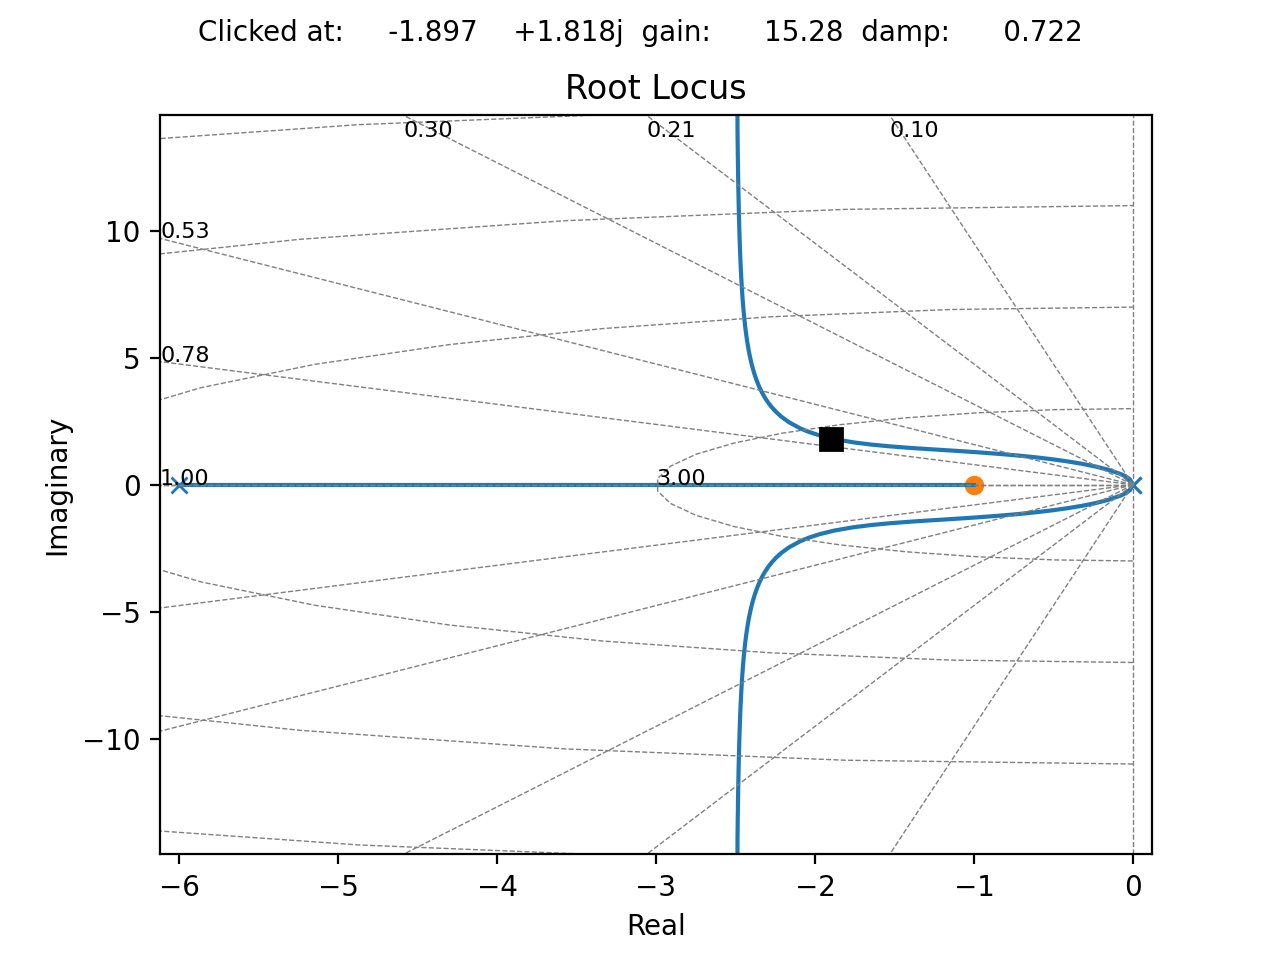

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define system parameters
K = 1   # This is one to have K to vary in the plot. We need to click on the value of gain 16.
zc = 1  # Zero of the compensator
pc = 6  # Pole of the compensator

# Define the transfer function
numerator = [K, K * zc] # 16s+16
denominator = [1, 6, 0, 0]  # s^3 + 6s^2
system = ctl.tf(numerator, denominator)

# Plot the root locus
ctl.rlocus(system)
plt.show()

# Use the plot to find the third pole at the specific gain K


### Apprendimento interattivo

Prendi in considerazione la progettazione di un compensatore di fase per un sistema in cui le prestazioni transitorie sono cruciali quanto la riduzione del rumore. La scelta delle posizioni polo e zero dovrebbe:

1. **Soddisfare le condizioni dell'angolo**: assicurarsi che il luogo delle radici passi attraverso le posizioni dei poli ad anello chiuso desiderate per la risposta transitoria richiesta.
2. **Filtraggio del rumore ad alta frequenza**: posizionare il palo in modo tale da filtrare efficacemente i componenti indesiderati ad alta frequenza, senza influire negativamente sulla risposta ai transitori.

**Esercizio interattivo**: gli studenti possono impegnarsi in un esercizio utilizzando uno strumento software come MATLAB o Python per sperimentare diversi rapporti polo-zero. L'osservazione di come queste regolazioni influiscono sia sulla risposta transitoria che sull'attenuazione del rumore fornirà spunti pratici sui compromessi coinvolti nella progettazione del compensatore.

### Requisiti per lo stato stazionario

Dato che abbiamo un sistema di tipo 2 questo non è un problema, certamente non per gradini e rampe. Se si deve calcolare l'errore di accelerazione, è possibile farlo da:

$$ D(s)G(s) = \frac{K \cdot (s + z_c)}{s^2 \cdot (s + p_c)} = \frac{16 \cdot (s + 1)}{s ^2 \cdot (s + 6)} $$

e quindi la costante di accelerazione è:

$$
K_a = \frac{16}{6}
$$

e il corrispondente errore di accelerazione è:

$$
e_{ss} = \frac{6}{16} radianti
$$

Questo è un valore finito e molto probabilmente accettabile. Seguire l'accelerazione è difficile e in genere ci accontentiamo degli input di gradino e rampa.

## Compensazione del ritardo di fase

In questa parte approfondiremo il concetto di compensazione del ritardo di fase. A differenza dei compensatori di anticipo di fase progettati per migliorare le prestazioni transitorie, i compensatori di ritardo di fase vengono utilizzati principalmente per migliorare la precisione in condizioni stazionarie.



### Il modello della rete a ritardo di fase

#### Funzione di trasferimento del compensatore di ritardo di fase

La funzione di trasferimento per un compensatore di ritardo di fase è generalmente data da:

$$ D(s) = \frac{s + z_c}{s + p_c} $$

Dove:
- $ z_c $ è lo zero del compensatore.
- $ p_c $ è il polo del compensatore.


#### Configurazione Polo Zero

- In un compensatore di sfasamento, il polo è solitamente posizionato vicino all'origine ma non necessariamente in corrispondenza di essa. Posizionando un polo all'origine lo si rende un controller Proporzionale-Integrale (PI).

- Lo zero ($ z_c $) è posizionato vicino al polo ($ p_c $), essenziale per mantenere la stabilità del sistema. Altrimenti la presenza del polo all'origine potrebbe destabilizzare il sistema.


<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_lag_compensator.png?2" alt="24_Compensators_and_Root_Locus_lag_compensator" style="width:550px;"/>
    </td>
</tr>
</table>

### Scelta tra compensatori di ritardo di fase e di anticipo di fase

#### Criteri decisionali

1. **Requisiti prestazionali temporanei**:
   - Se il sistema non compensato, tramite una regolazione del guadagno, soddisfa i requisiti di prestazione transitoria, allora si può prendere in considerazione un compensatore di ritardo di fase.
   - In caso contrario, e non è possibile scegliere un guadagno che soddisfi i requisiti di prestazione transitoria e se è necessario spostare il luogo della radice a sinistra, è più appropriato un compensatore di anticipo di fase.
   - Il guadagno del sistema non compensato è un fattore critico. Regolando questo guadagno, potresti soddisfare i requisiti prestazionali transitori senza bisogno di compensazioni aggiuntive.

2. **Precisione allo stato stazionario**:
   - Per migliorare la precisione in stato stazionario, in particolare nei sistemi di tipo 1 o tipo 0, un compensatore di ritardo di fase è una scelta adatta. L'utilizzo di un compensatore di ritardo con un sistema di tipo 2 è molto difficile a causa degli effetti instabilizzanti.
   - L'utilizzo di un compensatore di ritardo è simile all'aggiunta di un integratore per migliorare le prestazioni in condizioni stazionarie. Il polo e lo zero sono scelti in modo che le prestazioni transitorie non siano deteriorate. Avere lo zero il più vicino possibile al polo significa che si vuole ridurre l'effetto che il compensatore potrebbe avere sul transitorio.

### Esempio: applicazione della compensazione del ritardo di fase

#### Modello di sistema

Consideriamo un sistema di tipo 1 rappresentato da:

$$ G(s) = \frac{K}{s(s + 2)} $$

Questo modello potrebbe rappresentare un servosistema motore per il tracciamento della posizione.

#### Requisiti di prestazione

1. **Rapporto di smorzamento ($ \zeta $)**: 0,45
2. **Costante errore velocità ($ K_v $)**: 20 (per errore di rampa a regime)

### Valutazione del sistema non compensato

#### Costante di errore di velocità ($ K_v $)

Nell'esempio del nostro sistema di controllo, iniziamo valutando le prestazioni del sistema non compensato. Un parametro chiave in questa valutazione è la costante dell'errore di velocità, indicata come $ K_v $. Per il nostro sistema, $ K_v $ viene calcolato come segue:

$$ K_v = \frac{K}{2} $$

- $ K_v $ è una misura della capacità del sistema di tracciare gli ingressi della rampa. Un $ K_v $ più elevato implica migliori prestazioni di tracciamento per tali input.

### Posizioni desiderate dei poli a circuito chiuso

#### Calcolo della posizione dei poli per un dato rapporto di smorzamento

- Per un rapporto di smorzamento ($ \zeta $) di 0,45, i poli del circuito chiuso si trovano a $ -1 \pm 2j $.
- Questo calcolo si basa sulla dinamica del sistema standard del secondo ordine in cui le posizioni dei poli sono determinate dal rapporto di smorzamento e dalla frequenza naturale.

- La posizione di questi poli nel piano s influenza direttamente il comportamento transitorio del sistema, compresi aspetti come il superamento e il tempo di assestamento.

### Valutazione delle prestazioni del sistema a $ K = 5 $

#### Determinare quando i poli desiderati sono realizzabili


<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_lag_compensator_1.png?2" alt="24_Compensators_and_Root_Locus_lag_compensator_1" style="width:550px;"/>
    </td>
</tr>
</table>

_Figura: grafico del luogo delle radici che mostra come la variazione di $ K $ influisce sulle posizioni dei poli._

- Esaminando il grafico del luogo delle radici, possiamo identificare che i poli desiderati ad anello chiuso a $ -1 \pm 2j $ sono ottenibili quando il guadagno $ K $ è impostato su 5.

#### Precisione allo stato stazionario

- Quando $ K = 5 $, la costante dell'errore di velocità è:

  $$ K_v = \frac{K}{2} = \frac{5}{2} = 2,5 $$

- Tuttavia, questo valore di $ K_v $ è inferiore ai 20 richiesti per prestazioni adeguate in condizioni stazionarie.

### L'obiettivo della compensazione del ritardo di fase

#### Aumentare $ K_v $ per soddisfare i requisiti di stato stazionario

- L'obiettivo principale dell'introduzione di un compensatore di ritardo di fase in questo scenario è aumentare $ K_v $ per soddisfare il requisito di stato stazionario di 20.
- Ciò deve essere ottenuto garantendo che il diagramma del luogo delle radici compensato passi attraverso i poli desiderati a circuito chiuso a $ -1 \pm 2j $.

#### Bilanciamento delle prestazioni in stato stazionario e transitorio

- La sfida sta nell'incrementare $ K_v $ senza influenzare negativamente le prestazioni transitorie, che sono indicate dalle posizioni dei poli a circuito chiuso.

### Soddisfare i requisiti transitori

Per ottenere il risultato desiderato, posizioneremo sia lo zero che il polo del compensatore vicino all'origine. L'obiettivo qui è garantire che il loro contributo combinato all'angolo di fase del sistema sia minimo, idealmente entro un intervallo compreso tra 1 e 5 gradi. In questo modo, possiamo effettivamente garantire che questi elementi abbiano un impatto trascurabile sul grafico del luogo delle radici originale del sistema. Questo posizionamento strategico è fondamentale per mantenere le caratteristiche originali del sistema implementando al tempo stesso il compensatore di ritardo di fase.

### Soddisfa il requisito $K_v$

$$ D(s) G(s) = \frac{K (s+z_c)}{s(s + 2)(s+p_c)} $$

E

$$
K_v = \frac{K z_c}{2p_c} = 20
$$

ciò significa che possiamo utilizzare il rapporto $\frac{z_c}{p_c}$ per migliorare la nostra costante di velocità.

Più specificamente, per $K=5$ (notare che per lo stesso motivo per cui lo zero e il polo non disturbano il transitorio, non cambiano molto il valore del guadagno del luogo della radice, il boost di cui abbiamo bisogno è $\frac {z_c}{p_c}=8$.

Questo ci aiuta a definire la relazione tra lo zero e il polo del compensatore.

#### Posizionamento del polo e dello zero

- Partiamo dal porre lo zero a $z_c = -0.1$ (questo deriva dalla condizione di dominanza come vedremo tra poco).
- Il polo quindi si trova a: $p_c = \frac{-0.1}{8}=0.0125$


Il luogo delle radici è (questa non è una scala troppo grande per evidenziare le relazioni):

<table>
<tr>
    <td>
        <img src="../pics/24_Compensators_and_Root_Locus_lag_compensator_2.png?2" alt="24_Compensators_and_Root_Locus_lag_compensator_2" style="width:550px;"/>
    </td>
</tr>
</table>

#### Condizione di dominanza

È possibile verificare che il terzo polo deve essere reale, e quindi molto vicino allo zero. Ciò significa che la condizione di dominanza è soddisfatta (anche se è vicina all’asse immaginario). Se il terzo polo non è abbastanza vicino, possiamo apportare una modifica alle posizioni zero/polo per spostarlo più vicino allo zero. Questo viene in genere fatto utilizzando un software.

#### Simulazioni
Infine attraverso la simulazione possiamo verificare la piena prestazione (transitoria e stazionaria) del sistema.

## Compensazione del ritardo

Concludendo la nostra discussione sui compensatori del sistema di controllo, consideriamo come scegliere tra diversi tipi di compensatori in base alle prestazioni del sistema non compensato. Qui per "non compensato" intendiamo un sistema in cui sono consentite solo regolazioni del guadagno.

### Processo decisionale per il tipo di compensatore

1. **Quando scegliere un compensatore di ritardo**:
   - Se le prestazioni transitorie del sistema non compensato sono soddisfacenti, allora un compensatore di ritardo è una scelta adeguata.
   - Il ruolo principale del compensatore di ritardo in questo caso è quello di migliorare le prestazioni allo stato stazionario senza influenzare in modo significativo la risposta transitoria.

2. **Scelta di un compensatore principale**:
   - Se le prestazioni transitorie sono insoddisfacenti, la soluzione migliore è un compensatore di piombo.
   - Il compensatore principale è progettato per migliorare le prestazioni transitorie. Dopo averlo implementato, dovresti rivalutarlo per vedere se i requisiti di stato stazionario sono soddisfatti.

### Gestione delle prestazioni sia transitorie che stazionarie

- **Scenario**: Cosa succede se, dopo aver progettato un compensatore di fase, le prestazioni transitorie non sono soddisfacenti e i requisiti di stato stazionario non sono soddisfatti?
- **Soluzione**: In questi casi, prendere in considerazione l'utilizzo di un compensatore di piombo ritardato. Ciò comporta innanzitutto la progettazione di un compensatore principale per gestire le prestazioni transitorie e quindi la valutazione delle prestazioni allo stato stazionario.

### La procedura finale standard

1. **Valutare il sistema a circuito aperto**:
   - Studiare attentamente il sistema a circuito aperto con regolazioni del guadagno per valutare le prestazioni transitorie.

2. **Processo di progettazione**:
   - Se le prestazioni transitorie sono adeguate, optare per un compensatore di ritardo.
   - Se le prestazioni transitorie sono inadeguate, progettare un compensatore principale per correggere il problema.
   - Dopo aver implementato il compensatore del cavo, controllare l'errore a regime. Se è soddisfacente, il tuo progetto è completo.

3. **Incorporando un compensatore di ritardo se necessario**:
   - Se le prestazioni a regime sono ancora carenti, considerare il sistema compensato in anticipo come "non compensato" ai fini della progettazione di un compensatore del ritardo di fase.
   - Il compensatore di ritardo, in questo caso, non disturberà i miglioramenti transitori apportati dal compensatore di anticipo.

### Scelte progettuali finali

- La scelta progettuale finale può essere un anticipo, un ritardo o una combinazione di compensatori anticipo-ritardo, a seconda dei requisiti del sistema.
- Sono state discusse le realizzazioni dell'amplificatore operazionale (Op-Amp) sia per i compensatori lead-lag che per quelli lag-lead, consentendo l'implementazione pratica e la regolazione dei parametri.

**Conclusione**: la progettazione e la selezione dei compensatori dipendono dai requisiti prestazionali sia transitori che stazionari del sistema. Il processo decisionale prevede un'attenta valutazione delle prestazioni attuali del sistema e degli obiettivi che si intendono raggiungere con la remunerazione.

**Nota per l'istruttore**: incoraggiare gli studenti ad analizzare diversi scenari di sistema e decidere il tipo di compensatore necessario. Esercizi pratici che coinvolgono la progettazione di circuiti Op-Amp per compensatori lead-lag e lag-lead possono essere molto utili per comprendere questi concetti.